# Introduction

This is a Data Science project for the Udacity's Data Scientist Nanodegree. The project is divided into steps, following the CRISP-DM methodology.

---
# 1. Business Understanding

In this project, we dive in the Boston AirBnb Dataset, in order to answer 3 business questions:

1. What was the housestay that earned the most? Is it in the most expensive street? 
2. What are the busiest times of the year to visit Boston? By how much do prices spike?
3. Is it possible to predict the prices using the other informations?

The dataset covers the AirBnb listings from September/2016 till September/2017, and is available [here](https://www.kaggle.com/airbnb/boston).

---

## Import all the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

## Set the plot style to dark grid and remove the pandas display limit.

In [2]:
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

---
# 2. Data understading

In this step, we will go through the dataset, in order to understanding its meaning. We can see the data is in three .csv files.

## First, we list all the data, in order to acquire some general information about it.

In [3]:
df_cal = pd.read_csv('calendar.csv')
df_list = pd.read_csv('listings.csv')
df_rev = pd.read_csv('reviews.csv')

The `calendar.csv` file has data on the listings. It has the listings' dates, availability and prices.

In [4]:
df_cal

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


The `listings.csv` has lots of information about the listings, such as host information, housestays descriptions, address, etc. It comes from a web scrapping performed on the AirBnB website.

In [5]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

The `reviews.csv` file has user reviews on the listings. It has information on the users, the reviewed listings, and the comments text.

In [6]:
df_rev

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [7]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


## Exploring the data in calendar.csv

In [8]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [9]:
df_cal.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [10]:
print(df_cal.listing_id.nunique())
print(df_cal.available.nunique())

3585
2


In [11]:
df_cal.isnull().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [12]:
df_cal.available.unique()

array(['f', 't'], dtype=object)

In [13]:
# price is null only when the host is booked
df_cal[df_cal.available == 't']

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00


In [14]:
# we check the unique prices in order to have a better grasp of how the price strings are
df_cal.price.unique()

array([nan, '$65.00', '$75.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

---
# 3. Data preparation

In this step, we process and wrangle with the data, in order to acquire the insights we want, and make the data understandable for the machine learning model we are going to use.

### Change price from string to float

In [15]:
def price_to_float(val):
    """Change the prices strings to float
    values so we can process them as numerically.
    """
    dols, cents = val.split('.')
    dols = dols.replace(',', '')
    dols = float(dols[1:])
    cents = float(cents) / 100
    return dols + cents
mask = df_cal.price.notnull()
df_cal.price[mask] = df_cal.price[mask].apply(price_to_float)

<ipython-input-15-d19e4e3aaf20>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal.price[mask] = df_cal.price[mask].apply(price_to_float)


# What was the housestay that earned the most? Is it in the most expensive street?
---
It's time to answer our first business question! Let's estimate the housestay earnings by multiplying the number of times it was booked by its price. First, let's obtain the number of times the listed places were booked.

In [16]:
# get the registers for when the housestays are not available.
# we estimate they are booked when they are not available.
df_most_rented = df_cal[df_cal.available == 'f']
# group the listings by their ids, in order to get the amount of times
# each homestay was booked
df_most_rented = df_most_rented.groupby(by='listing_id').count()
df_most_rented = df_most_rented.reset_index()
df_most_rented = df_most_rented.rename(columns={'available': 'times_booked'})
df_most_rented = df_most_rented[['listing_id', 'times_booked']]
df_most_rented = df_most_rented.sort_values(by='times_booked', ascending=False)
df_most_rented

,listing_id,times_booked
2640,12898806,570
1741,8626752,365
2330,11624428,365
2313,11553697,365
2315,11569156,365
...,...,...
2530,12494334,1
3295,14584547,1
360,1755376,1
32,23668,1


Now, let's take the listed prices.

In [17]:
# get the prices and convert them to float
prices_df = df_list[['id', 'price']].copy()
prices_df.price = prices_df.price.apply(price_to_float)
prices_df = prices_df.rename(columns={'id': 'listing_id'})
# merge the dataframes in order to obtain the
# housestays' prices and amount of bookings
earnings_df = pd.merge(left=prices_df, right=df_most_rented, how='inner', on='listing_id')
# by multiplying the prices and the amount of bookings,
# we can estimate the housestays earnings 
earnings_df['earnings'] = np.multiply(earnings_df.price.values,
                                      earnings_df.times_booked.values)
earnings_df = earnings_df.sort_values(by='earnings', ascending=False)
TOP_ID = earnings_df['listing_id'].values[0]
earnings_df

,listing_id,price,times_booked,earnings
2967,12679021,3000.0,365,1095000.0
773,6093430,1400.0,365,511000.0
2149,6451456,1372.0,365,500780.0
2385,12962229,1275.0,365,465375.0
3007,14291722,1250.0,333,416250.0
...,...,...,...,...
1637,7489883,60.0,1,60.0
2439,9953144,58.0,1,58.0
886,12796808,53.0,1,53.0
2466,13478868,42.0,1,42.0


## Housestays' earnings plot

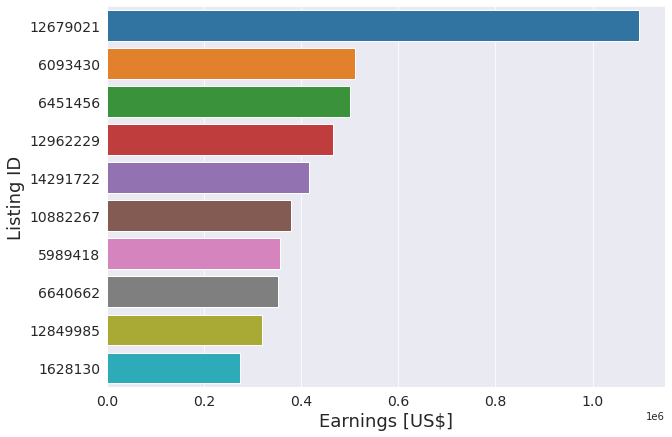

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(y='listing_id', x='earnings',
            data=earnings_df.iloc[:10], orient='h',
            order=earnings_df.listing_id[:10])
plt.xlabel('Earnings [US$]', fontdict={'size': 18})
plt.ylabel('Listing ID', fontdict={'size': 18})
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

## Dropping columns from `df_cal` that are useless for the analysis

In [19]:
d_columns = [i for i in df_list.columns if re.search('_url', i)]
d_columns += ['scrape_id', 'last_scraped', 'country', 'latitude',
              'longitude', 'calendar_updated', 'calendar_last_scraped']
df_list2 = df_list.drop(columns=d_columns)
df_list2.price = df_list2.price.apply(price_to_float)
df_list2.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,NaN,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",16701,Phil,2009-05-11,"Boston, Massachusetts, United States","I am a middle-aged, single male with a wide ra...",within a few hours,100%,88%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,"Ardale St., Boston, MA 02131, 

Listing for the housestay that earned the most.

In [20]:
table = df_list2[df_list2.id == TOP_ID][[
    'id', 'name', 'summary', 'description', 'price',
    'street', 'neighbourhood', 'amenities'
]]
table.to_excel('most_expensive_listings.xlsx')
table

,id,name,summary,description,price,street,neighbourhood,amenities
3055,12679021,View of IndyCar...ON THE STREET!,"Look out the window, use the common space, wha...","Look out the window, use the common space, wha...",3000.0,"Congress Street, Boston, MA 02210, United States",South Boston,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."


In [21]:
df_list2[df_list2.id == earnings_df.listing_id.values[0]][['price', 'neighbourhood', 'street']]

,price,neighbourhood,street
3055,3000.0,South Boston,"Congress Street, Boston, MA 02210, United States"


Housestay reviews
----

There are no reviews for this housestay, which is weird.

In [22]:
df_rev[df_rev.id == TOP_ID]

,listing_id,id,date,reviewer_id,reviewer_name,comments


Let's check how many times this place was rented. It seems the place was rented for the most part of the year, 336 days. It is really weird there are no reviews for it. Good reviews for such a successful place would be expected.

In [23]:
aux = df_cal[df_cal.listing_id == TOP_ID]
aux = aux[aux.available == 'f']
aux.count()

listing_id    365
date          365
available     365
price           0
dtype: int64

## Finding the most expensive neighbourhoods
---
We consider the most expensive areas to be the ones with the highest average price.

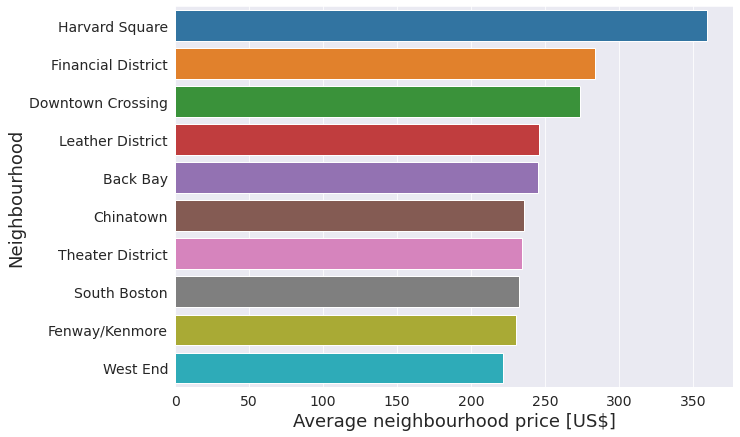

In [24]:
df_hood = df_list2.groupby(by='neighbourhood').mean()
df_hood = df_hood.reset_index()
df_hood = df_hood.sort_values(by='price', ascending=False)
# df_hood[['neighbourhood', 'price']].iloc[:20]

plt.figure(figsize=(10,7))
sns.barplot(y='neighbourhood', x='price',
            data=df_hood.iloc[:10], orient='h')
plt.xlabel('Average neighbourhood price [US$]', fontdict={'size': 18})
plt.ylabel('Neighbourhood', fontdict={'size': 18})
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

We conclude the most rentable housestay is in the top 10 most expensive neighbourhoods (9th) .

## Finding the most expensive streets

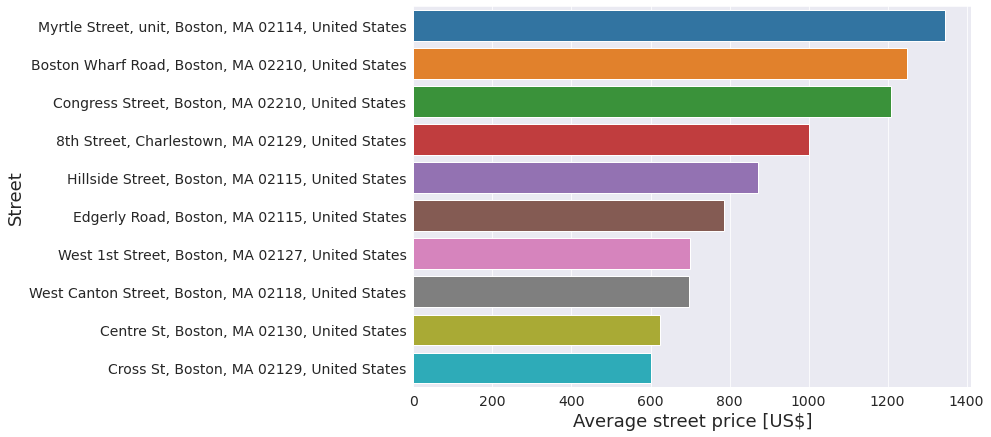

In [25]:
df_hood = df_list2.groupby(by='street').mean()
df_hood = df_hood.reset_index()
df_hood = df_hood.sort_values(by='price', ascending=False)
df_hood[['street', 'price']].iloc[:10]

plt.figure(figsize=(10,7))
sns.barplot(y='street', x='price',
            data=df_hood.iloc[:10], orient='h')
plt.xlabel('Average street price [US$]', fontdict={'size': 18})
plt.ylabel('Street', fontdict={'size': 18})
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

We conclude the most rentable housestay is in the top 10 most expensive streets (3rd) .

# What are the busiest times of the year to visit Boston? By how much do prices spike?
---
Now, we answer our second business question. First, we need to convert the dates from `str` to `datetime`.

In [26]:
df_cal2 = df_cal.copy()
df_cal2.date = pd.to_datetime(df_cal2.date)

Now, we create a column with only the months.

In [27]:
df_cal2['month'] = df_cal2.date.apply(lambda x: x.month)
df_cal2

,listing_id,date,available,price,month
0,12147973,2017-09-05,f,NaN,9
1,12147973,2017-09-04,f,NaN,9
2,12147973,2017-09-03,f,NaN,9
3,12147973,2017-09-02,f,NaN,9
4,12147973,2017-09-01,f,NaN,9
...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,9
1308886,14504422,2016-09-09,f,NaN,9
1308887,14504422,2016-09-08,f,NaN,9
1308888,14504422,2016-09-07,f,NaN,9


Split available and non-available homestays.

In [28]:
mask.values.sum()

643037

In [29]:
df_cal2f = df_cal2[df_cal2.price.isnull()]
df_cal2f.head()

,listing_id,date,available,price,month
0,12147973,2017-09-05,f,NaN,9
1,12147973,2017-09-04,f,NaN,9
2,12147973,2017-09-03,f,NaN,9
3,12147973,2017-09-02,f,NaN,9
4,12147973,2017-09-01,f,NaN,9


Count how many places are rented, in order to see the renting trend.

In [30]:
# in order to estimate the prices, we will work with
# the available homestays, since the do not have
# the booked places' prices. Therefore, we drop
# the NaN values, since they refer to rows
# without price information.
df_cal3 = df_cal2.dropna()[['month', 'price']]
df_cal3.price = df_cal3.price.astype(float)
df_cal3 = df_cal3.groupby(by='month').mean()
df_cal3 = df_cal3.reset_index()
df_cal3.head()

,month,price
0,1,182.799671
1,2,180.961028
2,3,181.818742
3,4,197.252890
4,5,193.712295


In [31]:
df_cal3f = df_cal2f[['month', 'date']].groupby(by='month').count()
df_cal3f = df_cal3f.rename(columns={'date': 'count'})
df_cal3f = df_cal3f.reset_index()
df_cal3f.head()

,month,count
0,1,47985
1,2,43598
2,3,55985
3,4,56198
4,5,57566


In [32]:
df_cal4 = df_cal2.dropna()
df_cal4['price'] = df_cal4['price'].copy().astype(float)
df_cal4 = df_cal4.groupby(by='month').mean().reset_index()
df_cal4

<ipython-input-32-157060c2a3f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal4['price'] = df_cal4['price'].copy().astype(float)


,month,listing_id,price
0,1,7.780883e+06,182.799671
1,2,7.742313e+06,180.961028
2,3,7.447318e+06,181.818742
3,4,7.419609e+06,197.252890
4,5,7.393200e+06,193.712295
5,6,7.404531e+06,196.535302
6,7,7.408728e+06,202.486309
7,8,7.403228e+06,203.330142
8,9,7.943009e+06,237.047727
9,10,8.327808e+06,233.416248


Get the average prices for each month, from the vacant homestays, since the rented ones do not present their prices.

In [33]:
def nice_lineplot(x_label, y_label, *kargs, **kwargs):
    """
    Function for not repeating plot specifications.
    """
    plt.figure(figsize=(10,7))
    plt.xlabel(x_label, fontdict={'size': 18})
    plt.ylabel(y_label, fontdict={'size': 18})
    plt.xticks(size=14)
    plt.yticks(size=14)
    sns.lineplot(*kargs, **kwargs)
    plt.show()

In [34]:
prices_spike = df_cal4.price.max() - df_cal4.price.min()
prices_spike_pct = (df_cal4.price.max() - df_cal4.price.min()) / df_cal4.price.min() * 100
reserves_spike = df_cal3f['count'].max() - df_cal3f['count'].min()
reserves_spike_pct = (df_cal3f['count'].max() - df_cal3f['count'].min()) / df_cal3f['count'].min() * 100
prices_spike_avg = df_cal4.price.max() - df_cal4.price.mean()
prices_spike_avg_pct = (df_cal4.price.max() - df_cal4.price.mean()) / df_cal4.price.mean() * 100
reserves_spike_avg = df_cal3f['count'].max() - df_cal3f['count'].mean()
reserves_spike_avg_pct = (df_cal3f['count'].max() - df_cal3f['count'].mean()) / df_cal3f['count'].mean() * 100
print(f'Prices spike - Min: US${prices_spike:.2f}, {prices_spike_pct:.2f}%.')
print(f'Prices spike - Avg: US${prices_spike_avg:.2f}, {prices_spike_avg_pct:.2f}%.')
print(f'Reserves spike - Min: {reserves_spike} reservations, {reserves_spike_pct:.2f}%.')
print(f'Reserves spike - Avg: {reserves_spike_avg} reservations, {reserves_spike_avg_pct:.2f}%.')

Prices spike - Min: US$56.09, 30.99%.
Prices spike - Avg: US$36.64, 18.28%.
Reserves spike - Min: 30584 reservations, 70.15%.
Reserves spike - Avg: 18694.25 reservations, 33.69%.


Lets plot the prices and number of listings over the months, so we may have a better understanding of the trends.

In the first plot, we see the prices spike around during September and October (months 9 and 10), and drop from January till March. When comparing to the low season, the prices and reservations spike by 31% and 70%, respectively, in the high season. In comparison with the average measurements, in the high season, the prices and reservations spike by 18% and 34%, respectively.

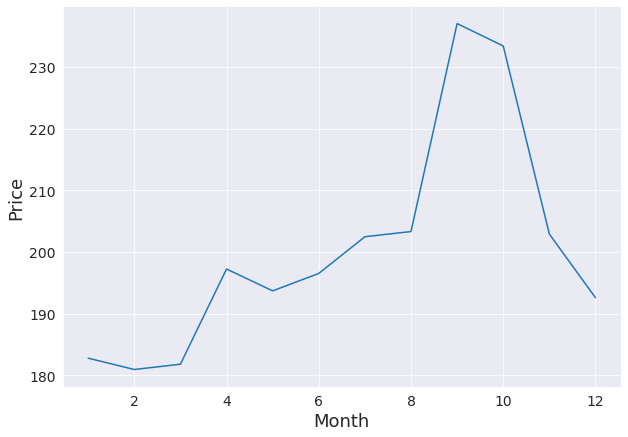

In [35]:
nice_lineplot(x_label='Month', y_label='Price', data=df_cal4,
              x='month', y='price')

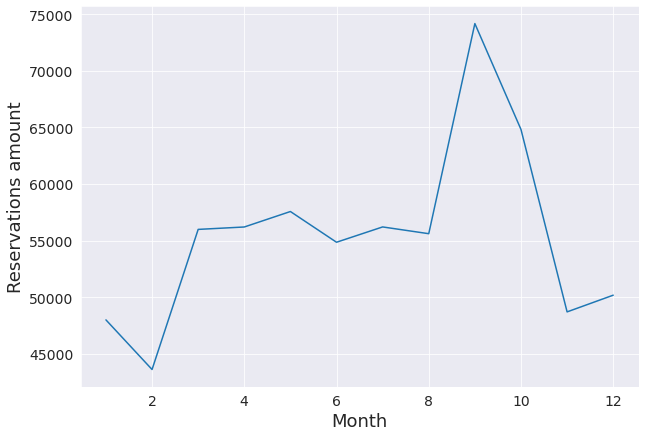

In [36]:
nice_lineplot(x_label='Month', y_label='Reservations amount', data=df_cal3f,
              x='month', y='count')

# Is it possible to predict the prices using the other informations?

This is our last business question. So far, we used only statistics. Now, we will need some machine learning to get the answers we want. Therefore, we will continue with the Data Preparation step, in order to make the data suitable for a machine learning algorithm.

In [37]:
df_list2.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,NaN,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",16701,Phil,2009-05-11,"Boston, Massachusetts, United States","I am a middle-aged, single male with a wide ra...",within a few hours,100%,88%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,"Ardale St., Boston, MA 02131, 

Since we will not perform NLP in this project, we will drop the columns with descriptions, and take the columns we think to be useful. This process may insert bias in the model.

In [38]:
desc_columns = [
    'id',
    'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_has_profile_pic', 
    'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'market',
    'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'bed_type', 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
    'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 
    'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'requires_license', 'instant_bookable', 'cancellation_policy',
    'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count',
    'reviews_per_month',
    'price',
    # 'weekly_price', 'monthly_price'
]
df_clf = df_list2[desc_columns]
df_clf.head()

,id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,market,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
0,12147973,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,Boston,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$35.00,1,$0.00,2,1125,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN,250.0
1,3075044,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,1,t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,Boston,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$95.00,$10.00,0,$0.00,2,15,26,54,84,359,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30,65.0
2,6976,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,1,t,t,"Ardale St., Boston, MA 02131, United States",Roslindale,Roslindale,Boston,Boston,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,NaN,1,$20.00,3,45,19,46,61,319,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47,65.0
3,1436513,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,1,t,f,"Boston, MA, United States",NaN,Roslindale,Boston,Boston,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$100.00,$50.00,2,$25.00,1,1125,6,16,26,98,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00,75.0
4,7651065,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,1,t,t,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,Boston,t,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$15.00,1,$0.00,2,31,13,34,59,334,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25,79.0


In [39]:
df_clf.shape

(3585, 49)

Let's check which columns have nan values

Since we have only 3585 rows in our data, let's drop columns with more than 200 nan values. For simplicity, we also drop the rows with nan values. In a real project, we should apply a more complex treatment to these rows.

In [40]:
na_cols = {c: df_clf[c].isnull().sum() for c in df_clf.columns if df_clf[c].isnull().sum() > 0}
print(na_cols)
drop_cols = [c for c in df_clf.columns if df_clf[c].isnull().sum() > 200]
df_clf2 = df_clf.drop(columns=drop_cols)
df_clf2 = df_clf2.dropna()
print(df_clf2.shape)
df_clf2.head()

{'host_location': 11, 'host_response_time': 471, 'host_response_rate': 471, 'host_acceptance_rate': 471, 'host_neighbourhood': 339, 'neighbourhood': 543, 'city': 2, 'market': 14, 'property_type': 3, 'bathrooms': 14, 'bedrooms': 10, 'beds': 9, 'security_deposit': 2243, 'cleaning_fee': 1107, 'review_scores_rating': 813, 'review_scores_accuracy': 823, 'review_scores_cleanliness': 818, 'review_scores_checkin': 820, 'review_scores_communication': 818, 'review_scores_location': 822, 'review_scores_value': 821, 'reviews_per_month': 756}
(3527, 34)


,id,host_location,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,market,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price
0,12147973,"Boston, Massachusetts, United States",f,1,t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,Boston,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",1,$0.00,2,1125,0,0,0,0,f,f,moderate,f,f,1,250.0
1,3075044,"Boston, Massachusetts, United States",f,1,t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,Boston,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,$0.00,2,15,26,54,84,359,f,t,moderate,f,f,1,65.0
2,6976,"Boston, Massachusetts, United States",t,1,t,t,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,Boston,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1,$20.00,3,45,19,46,61,319,f,f,moderate,t,f,1,65.0
3,1436513,"Boston, Massachusetts, United States",f,1,t,f,"Boston, MA, United States",Roslindale,Boston,Boston,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",2,$25.00,1,1125,6,16,26,98,f,f,moderate,f,f,1,75.0
4,7651065,"Boston, Massachusetts, United States",t,1,t,t,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,Boston,t,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",1,$0.00,2,31,13,34,59,334,f,f,flexible,f,f,1,79.0


In [41]:
df_clf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3527 entries, 0 to 3584
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3527 non-null   int64  
 1   host_location                     3527 non-null   object 
 2   host_is_superhost                 3527 non-null   object 
 3   host_listings_count               3527 non-null   int64  
 4   host_has_profile_pic              3527 non-null   object 
 5   host_identity_verified            3527 non-null   object 
 6   street                            3527 non-null   object 
 7   neighbourhood_cleansed            3527 non-null   object 
 8   city                              3527 non-null   object 
 9   market                            3527 non-null   object 
 10  is_location_exact                 3527 non-null   object 
 11  property_type                     3527 non-null   object 
 12  room_t

The variables types need some fixing. We will make boolean variables out of the `t/f` variables. We will make dummy variables out of the text variables. The numerical variables will stay as they are. The only variable that requires a more complex treatment is the `amenities` variable. Let's deal with it right now.

In [42]:
# 
def list_ammenities(val):
    """
    Helper function that splits the amenities values
    into strings.
    """
    x = val[1:-1].split(',')
    y = []
    for am in x:
        am = am.replace("'", "")
        am = am.replace('"', "")
        y.append(am)
    return y

list_ammenities(df_clf2['amenities'][0])

['TV',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets live on this property',
 'Dog(s)',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Fire Extinguisher',
 'Essentials',
 'Shampoo',
 'Laptop Friendly Workspace']

In [43]:
amenities = {}
for ind, i in enumerate(df_clf2['amenities']):
    ams = list_ammenities(i)
    for j in ams:
        if len(j) == 0:
            continue
        if j not in amenities.keys():
            amenities[j] = np.zeros(df_clf2.shape[0], dtype=np.bool_)
        amenities[j][ind] = True
amenities['id'] = df_clf2['id']
pd.DataFrame(amenities)

,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street,id
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12147973
1,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3075044
2,True,True,True,True,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6976
3,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1436513
4,False,True,True,False,False,False,True,False,False,False,True,False,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7651065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,False,True,True,True,False,False,True,True,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,8373729
3581,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,14844274
3582,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14585486
3583,False,False,True,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14603878


In [44]:
df_clf3 = pd.merge(on='id', how='inner', left=df_clf2, right=pd.DataFrame(amenities))
print(df_clf3.shape)
df_clf3.head()

(3527, 79)


,id,host_location,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,market,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street
0,12147973,"Boston, Massachusetts, United States",f,1,t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,Boston,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",1,$0.00,2,1125,0,0,0,0,f,f,moderate,f,f,1,250.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3075044,"Boston, Massachusetts, United States",f,1,t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,Boston,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,$0.00,2,15,26,54,84,359,f,t,moderate,f,f,1,65.0,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,6976,"Boston, Massachusetts, United States",t,1,t,t,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,Boston,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1,$20.00,3,45,19,46,61,319,f,f,moderate,t,f,1,65.0,True,True,True,True,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1436513,"Boston, Massachusetts, United States",f,1,t,f,"Boston, MA, United States",Roslindale,Boston,Boston,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",2,$25.00,1,1125,6,16,26,98,f,f,moderate,f,f,1,75.0,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,7651065,"Boston, Massachusetts, United States",t,1,t,t,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,Boston,t,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",1,$0.00,2,31,13,34,59,334,f,f,flexible,f,f,1,79.0,False,True,True,False,False,False,True,False,False,False,True,False,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Changing the t/f columns to True and False

In [45]:
def fix_tf(val):
    """
    Helper function for changing t/f labels
    to True/False boolean values.
    """
    if val == 't':
        return True
    elif val == 'f':
        return False
    else:
        return val


df_clf4 = df_clf3.copy()
for c in df_clf4.columns:
    df_clf4[c] = df_clf4[c].apply(fix_tf)
df_clf4

,id,host_location,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,market,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street
0,12147973,"Boston, Massachusetts, United States",False,1,True,False,"Birch Street, Boston, MA 02131, United States",Roslindale,Boston,Boston,True,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",1,$0.00,2,1125,0,0,0,0,False,False,moderate,False,False,1,250.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3075044,"Boston, Massachusetts, United States",False,1,True,True,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Boston,Boston,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,$0.00,2,15,26,54,84,359,False,True,moderate,False,False,1,65.0,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,6976,"Boston, Massachusetts, United States",True,1,True,True,"Ardale St., Boston, MA 02131, United States",Roslindale,Boston,Boston,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",1,$20.00,3,45,19,46,61,319,False,False,moderate,True,False,1,65.0,True,True,True,True,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1436513,"Boston, Massachusetts, United States",False,1,True,False,"Boston, MA, United States",Roslindale,Boston,Boston,False,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",2,$25.00,1,1125,6,16,26,98,False,False,moderate,False,False,1,75.0,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,7651065,"Boston, Massachusetts, United States",True,1,True,True,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,Boston,Boston,True,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",1,$0.00,2,31,13,34,59,334,False,False,flexible,False,False,1,79.0,False,True,True,False,False,False,True,False,False,False,True,False,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

Let's take out the categorical variables with more than 38 unique values, since we have only 3527 rows of data. Had we more rows, we could use more categorical variables.

In [46]:
un_cols = {c: df_clf4[c].nunique() for c in df_clf4.columns if df_clf4[c].dtype not in ('float', 'int', 'bool')}
print(un_cols)
drop_cols = [c for c in un_cols if un_cols[c] > 38]
df_clf5 = df_clf4.drop(columns=drop_cols)
print(df_clf5.shape)
df_clf5.head()

{'host_location': 175, 'street': 1226, 'neighbourhood_cleansed': 25, 'city': 38, 'market': 4, 'property_type': 13, 'room_type': 3, 'bed_type': 5, 'amenities': 3045, 'extra_people': 51, 'cancellation_policy': 4}
(3527, 75)


,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,market,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street
0,12147973,False,1,True,False,Roslindale,Boston,Boston,True,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,1,2,1125,0,0,0,0,False,False,moderate,False,False,1,250.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3075044,False,1,True,True,Roslindale,Boston,Boston,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,0,2,15,26,54,84,359,False,True,moderate,False,False,1,65.0,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,6976,True,1,True,True,Roslindale,Boston,Boston,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,3,45,19,46,61,319,False,False,moderate,True,False,1,65.0,True,True,True,True,False,False,True,False,True,True,True,False,True,True,False,False,True,False,True,True,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1436513,False,1,True,False,Roslindale,Boston,Boston,False,House,Private room,4,1.0,1.0,2.0,Real Bed,2,1,1125,6,16,26,98,False,False,moderate,False,False,1,75.0,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,7651065,True,1,True,True,Roslindale,Boston,Boston,True,House,Private room,2,1.5,1.0,2.0,Real Bed,1,2,31,13,34,59,334,False,False,flexible,False,False,1,79.0,False,True,True,False,False,False,True,False,False,False,True,False,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df_clf6 = pd.get_dummies(df_clf5)
df_clf6 = df_clf6.drop(columns=['id'])
df_clf6

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,TV,Wireless Internet,Kitchen,Free Parking on Premises,Pets live on this property,Dog(s),Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Fire Extinguisher,Essentials,Shampoo,Laptop Friendly Workspace,Internet,Air Conditioning,Pets Allowed,Carbon Monoxide Detector,Lock on Bedroom Door,Hangers,Hair Dryer,Iron,Cable TV,First Aid Kit,Safety Card,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Gym,Breakfast,Indoor Fireplace,Cat(s),24-Hour Check-in,Hot Tub,Buzzer/Wireless Intercom,Other pet(s),Washer / Dryer,Smoking Allowed,Suitable for Events,Wheelchair Accessible,Elevator in Building,Pool,Doorman,Paid Parking Off Premises,Free Parking on Street,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston,city_Hyde Park,city_Jamaica Plain,city_Jamaica Plain,city_Jamaica Plain (Boston),"city_Jamaica Plain, Boston","city_Jamaica Plain, MA",city_Jamaica plain,city_Mattapan,city_Milton,"city_Mission Hill, Boston",city_Newton,city_ROXBURY CROSSING,city_Roslindale,"city_Roslindale, Boston",city_Roxbury Crossing,city_Somerville,city_South Boston,"city_South End, Boston",city_Watertown,city_West Roxbury,city_boston,"city_dorchester, boston",city_east Boston,city_波士顿,market_Boston,market_Other (Domestic),market_Other (International),market_San Francisco,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,False,1,True,False,True,4,1.5,2.0,3.0,1,2,1125,0,0,0,0,False,False,False,False,1,250.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,False,1,True,True,True,2,1.0,1.0,1.0,0,2,15,26,54,84,359,False,True,False,False,1,65.0,True,True,True,False,True,True,True,True,True,True,True,True,True,

---
# 4. Modelling

In this step, we will choose our ML model and train it.

Since we want to predict the listings' prices, which is a continuous value variable, we need a regressor. Therefore, we choose the Decision Tree Regressor, which is a well stablished model.

In [55]:
# make input (X) and output(y) data
X = df_clf6.drop(columns=['price'])
y = df_clf6['price']
# rescale the data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X.to_numpy())
y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1))
best_reg = 0
# classifier
# we perform a search for the best model
# initialization.
rnd_states = range(500)
best_rnd = 0
min_loss = float('inf')
best_test = 0
for rnd_state in rnd_states:
    X_train, X_test, y_train, y_test = \
        train_test_split(X_scaled, y_scaled, test_size=0.2,
                         random_state=rnd_state)
    regressor = DecisionTreeRegressor(random_state=rnd_state)
    regressor.fit(X_train, y_train.reshape(-1, 1))
    y_pred = regressor.predict(X_test)
    err = mean_squared_error(y_pred, y_test.reshape(-1))
    if err < min_loss:
        best_rnd = rnd_state
        min_loss = err
        best_reg = deepcopy(regressor)
        best_test = (deepcopy(X_test), deepcopy(y_test))

In [49]:
min_loss

0.3742004802711893

In [50]:
X_test, y_test = best_test
y_pred = best_reg.predict(X_test)
err = mean_squared_error(y_pred, y_test.reshape(-1))
results = pd.DataFrame(
    {
        'pred': scaler_y.inverse_transform(y_pred),
        'real_value': scaler_y.inverse_transform(y_test.reshape(-1)),        
    })
results['err'] = results['pred'] - results['real_value']
results['err'] = results['err'].abs()
results

,pred,real_value,err
0,91.0,80.0,11.0
1,35.0,60.0,25.0
2,299.0,250.0,49.0
3,150.0,215.0,65.0
4,195.0,279.0,84.0
...,...,...,...
701,88.0,90.0,2.0
702,90.0,100.0,10.0
703,180.0,140.0,40.0
704,129.0,189.0,60.0


In [51]:
table = results.describe()
table.to_excel('ml_performance.xlsx')
table

,pred,real_value,err
count,706.000000,706.000000,706.000000
mean,179.706799,174.271955,54.803116
std,137.596874,123.683133,72.975306
min,20.000000,11.000000,0.000000
25%,88.000000,87.250000,10.000000
50%,150.000000,150.000000,30.000000
75%,228.000000,225.000000,70.000000
max,1345.000000,1372.000000,696.000000


---
# 5. Evaluation

In this last CRISP-DM step, we evaluate our model's performance. How well was it able to predict the prices?

Our price regression model did not achieve an optimal performance. However, 50\% of the obtained errors are below US\\$30.00, which is only 21\% of the prices standard deviation. 75\% of the errors are below US\\$70.00, which is 51\% of the price standard deviation. Therefore, we still achieved a fairly good model.

Next, we plot the Real and Predicted values for the test dataset, so we may have a better visualization of the model's performance. On the sequence, we plot the errors, also for better visualization. The closer the errors are to zero, the better.

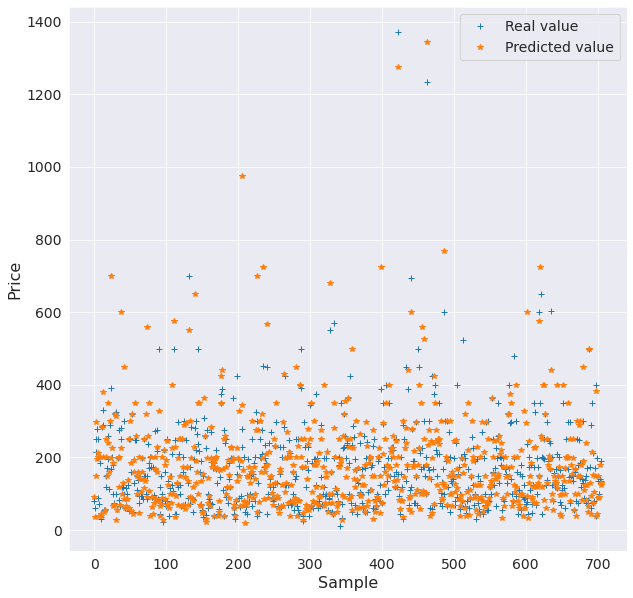

In [52]:
plt.figure(figsize=(10,10))
plt.plot(results['real_value'], '+', label='Real value')
plt.plot(results['pred'], '*', label='Predicted value')
plt.xlabel('Sample', fontdict={'size': 16})
plt.ylabel('Price', fontdict={'size': 16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

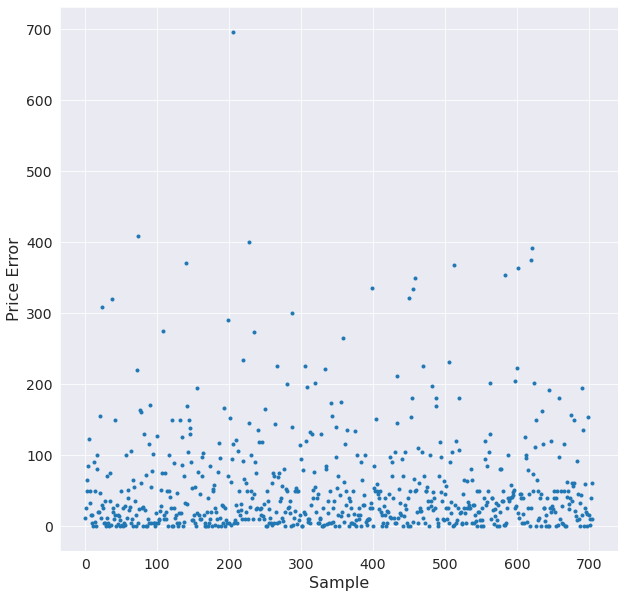

In [53]:
plt.figure(figsize=(10,10))
plt.plot(results['err'], '.')
plt.xlabel('Sample', fontdict={'size': 16})
plt.ylabel('Price Error', fontdict={'size': 16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Next, we see the feature importances extracted from the Decision Tree Regressor. We may notice the most important features are:
* If Fenway is the homestay's cleansed neighbourhood.
* If the rooms are of type Home/Apt.
* The presence of cats. (This is actualy quite funny.)
* The number of bathrooms.
* The availability.

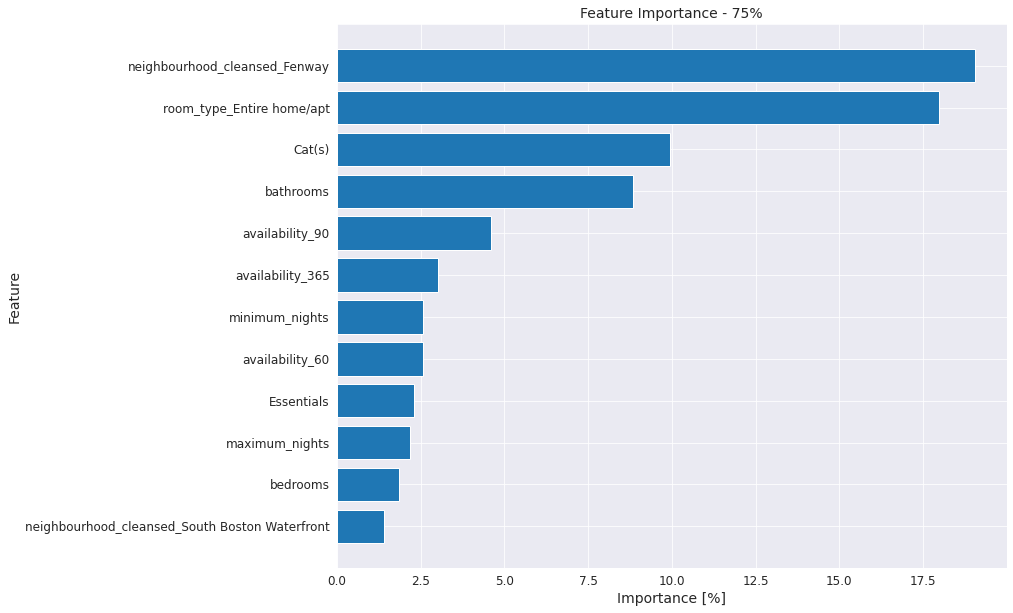

In [54]:
s_idx = best_reg.feature_importances_.argsort()[::-1]
pcts_acc = \
    np.array([np.sum(best_reg.feature_importances_[s_idx][:i]) for i in range(len(s_idx))])
s75_idx = s_idx[pcts_acc < .75][::-1]
x = X.columns.values[s75_idx]
y = best_reg.feature_importances_[s75_idx]*100
plt.figure(figsize=(12,10))
plt.barh(x, y)
plt.title('Feature Importance - 75%', fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xlabel("Importance [%]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

There are some steps we could take in order to try and improve the model's performance. They are:
* Increasing the amount of data. Unfortunately, we have only a small amount of data available to us.
* Performing a deeper feature engineering.
* Testing other regression algorithms.
* Removing outliers with outlier detection techniques. This may help the model achieve a better generalization.

In conclusion, we see it is possible to achieve reasonable price predictions, based on the homestays' data. Furthermore, it is even possible to improve the model by taking the suggested measures.

# The End